In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['axes.unicode_minus'] = False  

In [2]:
df = pd.read_csv('시군구_출생아수__합계출산율_20240627002952.csv', encoding='cp949')
df

,시점,구미시,구미시.1
0,시점,출생아수,합계출산율
1,2011,5079,1.418
2,2012,5386,1.510
3,2013,4790,1.368
4,2014,4917,1.438
5,2015,4760,1.440
6,2016,4286,1.343
7,2017,3727,1.201
8,2018,3360,1.110
9,2019,2891,0.984


In [11]:
df.iloc[13, 0] = df.iloc[13, 0][:4]
df

,시점,구미시,구미시.1
0,시점,출생아수,합계출산율
1,2011,5079,1.418
2,2012,5386,1.510
3,2013,4790,1.368
4,2014,4917,1.438
5,2015,4760,1.440
6,2016,4286,1.343
7,2017,3727,1.201
8,2018,3360,1.110
9,2019,2891,0.984


In [16]:
year = df['시점'][1:] 
year

1     2011
2     2012
3     2013
4     2014
5     2015
6     2016
7     2017
8     2018
9     2019
10    2020
11    2021
12    2022
13    2023
Name: 시점, dtype: object

In [21]:
new_df = pd.DataFrame(
    {
        '년도': df['시점'][1:].astype(int),
        '출생아수': df['구미시'][1:].astype(int),
        '합계출산율' : df['구미시.1'][1:].astype(float)
	}
)

new_df

,년도,출생아수,합계출산율
1,2011,5079,1.418
2,2012,5386,1.510
3,2013,4790,1.368
4,2014,4917,1.438
5,2015,4760,1.440
6,2016,4286,1.343
7,2017,3727,1.201
8,2018,3360,1.110
9,2019,2891,0.984
10,2020,2695,0.944


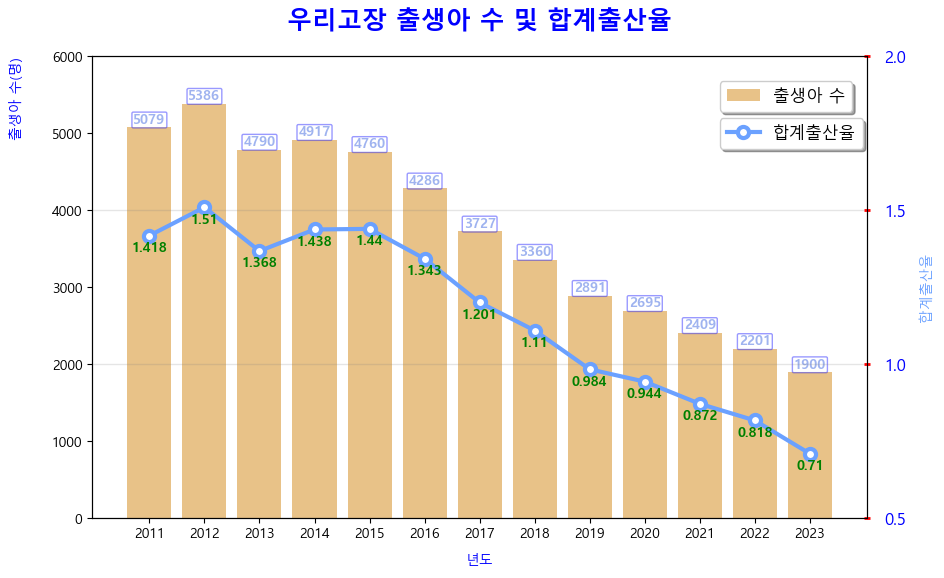

In [106]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(new_df['년도'], new_df['출생아수'], color='#E8C288', label='출생아 수')

for i in range(0, len(new_df.index), 1):
    ax.text(
            new_df.iloc[i]['년도'], int(new_df.iloc[i]['출생아수']+95), int(new_df.iloc[i]['출생아수']), 
            fontsize=10,                    # 글씨 크기
            color='royalblue',               # 글씨 색깔 
            fontweight='bold',              # 굵게
            backgroundcolor='lightgray',    # 밝은 회색 배경 색
            alpha=0.5,                      # 0.5 투명도
            va='center',                    # 세로축 정렬: top, bottom, center
            ha='center',                    # 가로축 정렬: left, right, center
            rotation='horizontal',          # 회전: vertical, horizontal
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="blue", pad=0.1)
        )
    
ax.set_xlabel('년도', labelpad=10, loc='center', color='blue')          
ax.set_ylabel('출생아 수(명)', labelpad=20, loc='top', color='blue') 

ax.set_xticks(np.arange(2011, 2024, 1))
ax.set_yticks(np.arange(0, 7000, 1000))

ax.legend(loc=(0.81, 0.88), fontsize=12, shadow=True)

# x축을 공유하는 axis를 만든다
ax2 = ax.twinx()

ax2.plot(
    new_df['년도'], new_df['합계출산율'],
	color='#6BA1FF', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#6BA1FF', 
    markerfacecolor='white',
	markeredgewidth='3', 
	linewidth=3, 
    label='합계출산율'
)

for i in range(0, len(new_df.index), 1):
    ax2.text(new_df.iloc[i]['년도'], new_df.iloc[i]['합계출산율']-0.04, new_df.iloc[i]['합계출산율'], 
             fontsize=10, 
             color='green', 
             fontweight='bold', 
             va='center',
             ha='center'
            )

ax2.set_yticks(np.arange(0.5, 2.5, 0.5))
ax2.set_ylabel('합계출산율', labelpad=10, loc='center', color='#6BA1FF') 
ax2.legend(loc=(0.81, 0.8), fontsize=12, shadow=True)
ax2.tick_params(axis='y',  direction='inout', length=5, pad=10, labelsize=12, labelcolor='blue', width=2, color='red')

plt.grid(True, axis='y', color='gray', alpha=0.2, linestyle='-', linewidth=1)
plt.title('우리고장 출생아 수 및 합계출산율', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})

plt.show()